In [102]:
import pandas as pd
import pycaret
from pycaret.classification import *

In [103]:
df = pd.read_pickle("../data/depresjon/depresjon_preprocessed.pkl")
df

,user_id,activity,days,gender,age,afftype,melanch,inpatient,edu,marriage,...,month_sin,weekday_sin,week_sin,day_sin,month_cos,weekday_cos,week_cos,day_cos,activity_quantile,user_activity_quantile
0,1,174.144444,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.974928,-0.998027,0.988468,-0.222521,-0.222521,0.062791,0.151428,1,1
1,1,156.247222,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,0.433884,-0.998027,0.998717,-0.222521,-0.900969,0.062791,-0.050649,1,1
2,1,124.135417,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,-0.433884,-0.998027,0.968077,-0.222521,-0.900969,0.062791,-0.250653,1,1
3,1,134.961806,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,-0.974928,-0.998027,0.897805,-0.222521,-0.222521,0.062791,-0.440394,1,1
4,1,99.439583,11,2,1,2.0,2.0,2.0,1,1.0,...,-0.974928,-0.781831,-0.998027,0.790776,-0.222521,0.623490,0.062791,-0.612106,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
400,9,162.295833,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,-0.781831,-0.481754,0.937752,0.623490,0.623490,0.876307,0.347305,1,0
401,9,224.508333,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,0.000000,-0.24869,0.988468,0.623490,1.000000,0.968583,0.151428,1,2
402,9,202.056250,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,0.781831,-0.24869,0.998717,0.623490,0.623490,0.968583,-0.050649,1,2
403,9,168.656250,13,2,2,1.0,2.0,2.0,1,1.0,...,-0.781831,0.974928,-0.24869,0.968077,0.623490,-0.222521,0.968583,-0.250653,1,1


In [104]:
df['category_madrs'].value_counts()

0    201
1    188
Name: category_madrs, dtype: int64

In [105]:
def train_test_split_per_user(data, train_size=0.7):
    users = list(set(data.user_id))
    users = sorted(users, reverse=True)  # fix randomness
    total_users = len(users)
    slice = int(train_size * total_users)
    users_train = users[:slice]
    users_test = users[slice:]
    return data[data.user_id.isin(users_train)], data[data.user_id.isin(users_test)]

In [106]:
train_data, test_data = train_test_split_per_user(df)

fold_groups = train_data.user_id
train_data = train_data.drop(columns=['user_id'])
test_data = test_data.drop(columns=['user_id'])

In [107]:
s = setup(data=train_data, target='category_madrs', session_id=123, fold_strategy='groupkfold', fold=5,  
          fold_groups=fold_groups, test_data=test_data, fix_imbalance=True, normalize=True)

,Description,Value
0,Session id,123
1,Target,category_madrs
2,Target type,Binary
3,Original data shape,"(389, 22)"
4,Transformed data shape,"(431, 22)"
5,Transformed train set shape,"(306, 22)"
6,Transformed test set shape,"(125, 22)"
7,Numeric features,21
8,Preprocess,True
9,Imputation type,simple


In [108]:
best = compare_models(sort = 'F1')

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC,TT (Sec)
gbc,Gradient Boosting Classifier,0.7485,0.6511,0.7086,0.7151,0.6928,0.4572,0.4780,0.0300
catboost,CatBoost Classifier,0.6097,0.5875,0.7086,0.6287,0.6263,0.3390,0.3830,0.5320
dt,Decision Tree Classifier,0.6158,0.4938,0.5086,0.5467,0.5100,0.1758,0.1907,0.0200
xgboost,Extreme Gradient Boosting,0.6158,0.5344,0.5086,0.5467,0.5100,0.1758,0.1907,0.0280
et,Extra Trees Classifier,0.6254,0.6091,0.4500,0.4524,0.4396,0.2984,0.2824,0.0760
ada,Ada Boost Classifier,0.4728,0.4000,0.5086,0.4593,0.4322,0.1547,0.1025,0.0400
knn,K Neighbors Classifier,0.4465,0.4436,0.3366,0.4361,0.3301,0.1218,0.0839,0.0180
lightgbm,Light Gradient Boosting Machine,0.5530,0.5574,0.3086,0.3467,0.3100,-0.0242,-0.0093,0.1640
nb,Naive Bayes,0.4203,0.4431,0.3086,0.3032,0.2769,-0.0415,-0.0771,0.0280
ridge,Ridge Classifier,0.3882,0.0000,0.3222,0.2908,0.2512,-0.0764,-0.1192,0.0180


Processing:   0%|          | 0/69 [00:00<?, ?it/s]

In [109]:
algo = create_model('gbc')

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.5000,1.0000,0.7333,0.8462,0.0000,0.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,0.9412,0.9839,1.0000,0.8421,0.9143,0.8700,0.8775
3,0.6800,0.7714,0.5429,1.0000,0.7037,0.4161,0.5125
4,0.3878,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.7485,0.6511,0.7086,0.7151,0.6928,0.4572,0.4780
Std,0.2170,0.3725,0.3961,0.3715,0.3597,0.4207,0.4219


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

In [110]:
algo

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.1, loss='log_loss', max_depth=3,
                           max_features=None, max_leaf_nodes=None,
                           min_impurity_decrease=0.0, min_samples_leaf=1,
                           min_samples_split=2, min_weight_fraction_leaf=0.0,
                           n_estimators=100, n_iter_no_change=None,
                           random_state=123, subsample=1.0, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

In [111]:
#algo.get_all_params()

In [112]:
tuned_algo = tune_model(algo)

,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
Fold,,,,,,,
0,0.7333,0.4162,1.0000,0.7333,0.8462,0.0000,0.0000
1,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
2,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000,1.0000
3,0.6800,0.7714,0.5429,1.0000,0.7037,0.4161,0.5125
4,0.3878,0.0000,0.0000,0.0000,0.0000,0.0000,0.0000
Mean,0.7602,0.6375,0.7086,0.7467,0.7100,0.4832,0.5025
Std,0.2284,0.3837,0.3961,0.3874,0.3717,0.4485,0.4472


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 5 folds for each of 10 candidates, totalling 50 fits


In [113]:
#tuned_algo.get_all_params()

In [114]:
tuned_algo

GradientBoostingClassifier(ccp_alpha=0.0, criterion='friedman_mse', init=None,
                           learning_rate=0.3, loss='log_loss', max_depth=5,
                           max_features=1.0, max_leaf_nodes=None,
                           min_impurity_decrease=0.0005, min_samples_leaf=3,
                           min_samples_split=7, min_weight_fraction_leaf=0.0,
                           n_estimators=160, n_iter_no_change=None,
                           random_state=123, subsample=0.45, tol=0.0001,
                           validation_fraction=0.1, verbose=0,
                           warm_start=False)

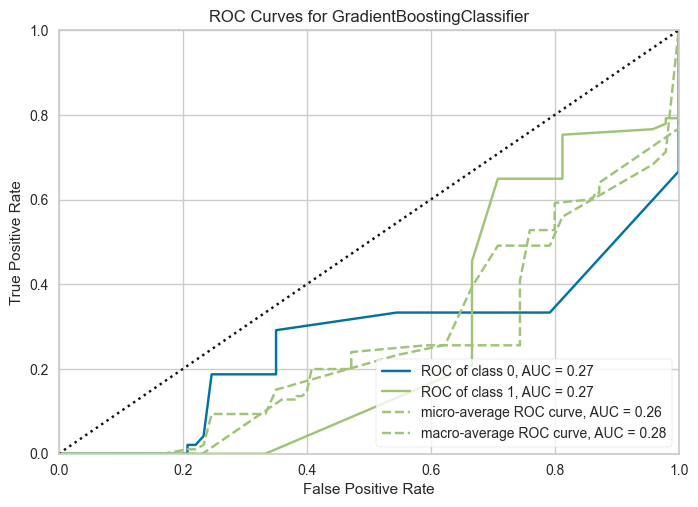

In [115]:
plot_model(tuned_algo, plot = 'auc')

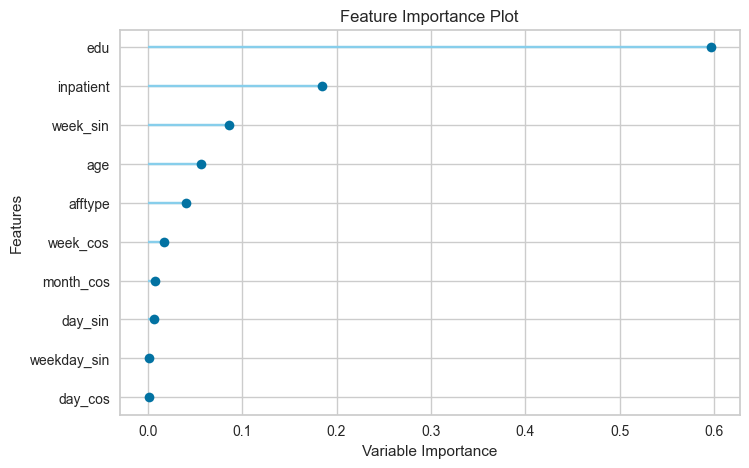

In [116]:
plot_model(tuned_algo, plot='feature')

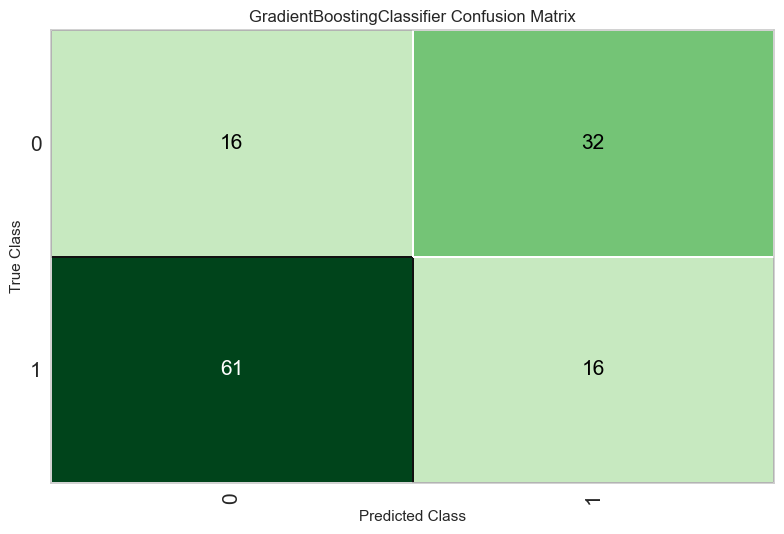

In [117]:
plot_model(tuned_algo, plot = 'confusion_matrix')

In [118]:
# Predict on test / hold-out Sample
test_predictions = predict_model(tuned_algo, data=test_data)

,Model,Accuracy,AUC,Recall,Prec.,F1,Kappa,MCC
0,Gradient Boosting Classifier,0.2560,0.2687,0.2078,0.3333,0.2560,-0.4120,-0.4589
